In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Embedding, SpatialDropout1D
from tensorflow.keras.models import Sequential
import re
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
print("READING CSV FILE FROM DIRECTORY")
df = pd.read_csv(r'C:\New folder\suspicious tweets.csv')
print(df)
print(' ')

READING CSV FILE FROM DIRECTORY
                                                 message  label
0      @switchfoot http://twitpic.com/2y1zl - Awww, t...      1
1      is upset that he can't update his Facebook by ...      1
2      @Kenichan I dived many times for the ball. Man...      1
3        my whole body feels itchy and like its on fire       0
4      @nationwideclass no, it's not behaving at all....      1
...                                                  ...    ...
59995  Really wants to go and see 17 again, because Z...      1
59996                              @krissa22 Thank you!       1
59997                                   dreaming of you       1
59998     @TheEllenShow I saw a clip online!  good show!      1
59999             @msdivineknight k hun, no worries!  xx      1

[60000 rows x 2 columns]
 


In [3]:

print("GROUP BY DATASET USING LABEL COLUMN")
df1 = df.groupby('label').describe()
print(df1)
print(' ')

GROUP BY DATASET USING LABEL COLUMN
      message                                                               
        count unique                                                top freq
label                                                                       
0        6145   6133  Something for nothing doesn't exist. What will...    2
1       53855  53574                                             #NAME?    7
 


In [4]:

unique_classes = df['label'].unique()

num_classes = len(unique_classes)

print("Number of classes:", num_classes)


Number of classes: 2


PLOT THE PIE CHART


C:\Users\kamal\AppData\Local\Temp\ipykernel_26892\1201780640.py:2: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_Class = pd.value_counts(df.label, sort=True)


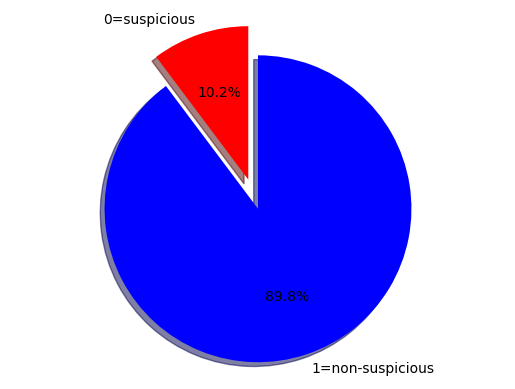

In [5]:
print("PLOT THE PIE CHART")
count_Class = pd.value_counts(df.label, sort=True)
labels = '0=suspicious', '1=non-suspicious'
sizes = [count_Class[0], count_Class[1]]
colors = ['red', 'blue']

explode = (0.1, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()
print(' ')

In [6]:

print("PREPROCESSING THE DATA")
df['message'] = df['message'].astype(str)


def preprocess_text(sen):
    sentence = re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)', ' ', sen)  # Removing html tags
    sentence = re.sub('[^a-zA-Z]', ' ', sentence)  # Remove punctuations and numbers
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)  # Single character removal
    sentence = re.sub(r'\s+', ' ', sentence)  # Removing multiple spaces
    sentence = sentence.replace("ain't", "am not").replace("aren't", "are not")
    sentence = ' '.join(text.lower() for text in sentence.split(' '))  # Lowering cases
    return sentence


df['message'] = df['message'].apply(lambda x: preprocess_text(x))
print(df['message'])
print(' ')

PREPROCESSING THE DATA
0         switchfoot that a bummer you shoulda got davi...
1        is upset that he can update his facebook by te...
2         kenichan dived many times for the ball manage...
3          my whole body feels itchy and like its on fire 
4         nationwideclass no it not behaving at all m m...
                               ...                        
59995    really wants to go and see again because zac e...
59996                                    krissa thank you 
59997                                     dreaming of you 
59998              theellenshow saw clip online good show 
59999                     msdivineknight hun no worries xx
Name: message, Length: 60000, dtype: object
 


In [7]:
print('REMOVING STOPWORDS FROM PREPROCESSED DATA')
nltk.download('stopwords')


def remove_stopwords(sen):
    sw = stopwords.words('english')
    sentence = ' '.join(text for text in sen.split() if text not in sw)
    return sentence


df['message'] = df['message'].apply(lambda y: remove_stopwords(y))
print(df['message'])
print(' ')

REMOVING STOPWORDS FROM PREPROCESSED DATA


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        switchfoot bummer shoulda got david carr third...
1                            upset update facebook texting
2        kenichan dived many times ball managed save re...
3                         whole body feels itchy like fire
4                         nationwideclass behaving mad see
                               ...                        
59995          really wants go see zac efron amazingly fit
59996                                         krissa thank
59997                                             dreaming
59998               theellenshow saw clip online good show
59999                        msdivineknight hun worries xx
Name: message, Length: 60000, dtype: object
 


In [8]:
print('MAKE TOKENIZATION')
nltk.download('punkt')


def tokenization(sen):
    tokens = word_tokenize(sen)
    return tokens


df['message'] = df['message'].apply(lambda z: tokenization(z))
print(df['message'])
print(" ")

MAKE TOKENIZATION


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kamal\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0        [switchfoot, bummer, shoulda, got, david, carr...
1                       [upset, update, facebook, texting]
2        [kenichan, dived, many, times, ball, managed, ...
3                  [whole, body, feels, itchy, like, fire]
4                    [nationwideclass, behaving, mad, see]
                               ...                        
59995    [really, wants, go, see, zac, efron, amazingly...
59996                                      [krissa, thank]
59997                                           [dreaming]
59998        [theellenshow, saw, clip, online, good, show]
59999                   [msdivineknight, hun, worries, xx]
Name: message, Length: 60000, dtype: object
 


In [9]:

ps = PorterStemmer()
df['message'] = df['message'].apply(lambda x: [ps.stem(y) for y in x])
print(df['message'])

0        [switchfoot, bummer, shoulda, got, david, carr...
1                           [upset, updat, facebook, text]
2        [kenichan, dive, mani, time, ball, manag, save...
3                   [whole, bodi, feel, itchi, like, fire]
4                       [nationwideclass, behav, mad, see]
                               ...                        
59995    [realli, want, go, see, zac, efron, amazingli,...
59996                                      [krissa, thank]
59997                                              [dream]
59998         [theellenshow, saw, clip, onlin, good, show]
59999                     [msdivineknight, hun, worri, xx]
Name: message, Length: 60000, dtype: object


In [10]:

l=[]
for i in df['message']:
  l.append(len(i))
  max(l)
print(max(l))

24


In [11]:

max_words =  5000
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(df['message'])

sequences = tokenizer.texts_to_sequences(df['message'])
print(sequences)

[[1, 1189, 2868, 10, 899, 4926, 1655, 4], [579, 212, 404, 429], [1, 4490, 207, 12, 942, 614, 529, 318, 2, 3361], [328, 699, 20, 2744, 7, 862], [1, 2619, 525, 22], [1, 328, 1754], [31, 397], [1, 82, 97, 12, 22, 81, 131, 195, 195, 18, 463, 16], [1, 696], [1, 2172, 1], [287, 200, 2248, 278], [2415, 891], [1, 1264, 27, 156, 1, 985, 3184], [1, 782, 960, 359, 85, 111, 338], [1, 51, 90, 2745, 24, 65, 1548, 1, 1], [1, 44, 10, 27, 23, 1, 1581], [2416, 783, 1705, 155, 1755, 27, 536, 1, 3573, 438], [918, 919], [1, 633, 468, 114, 14, 22, 1446, 9, 2746], [1, 39, 475, 243, 2173, 1285, 243], [1, 4, 3, 41, 102], [15, 61, 117, 266, 170, 1621, 3847, 12, 494], [1810, 1, 1212, 671, 603], [57, 2, 28], [1, 263, 46], [76, 117, 262, 74], [2, 276, 45, 27, 1410], [29, 55, 23, 1], [3848, 3, 525], [], [1656, 537, 2090, 32, 33, 15], [1, 14, 2, 1811, 1977, 3362, 1, 406, 188, 2, 15, 1, 188, 65], [156, 45, 1411, 46, 508, 1, 36, 5, 484], [1, 1706, 9, 23], [1, 276, 3849, 340, 45, 21], [100, 84, 572, 77, 267, 390, 292, 

In [12]:
maxlen = max(l)  
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')
print(padded_sequences)

[[   1 1189 2868 ...    0    0    0]
 [ 579  212  404 ...    0    0    0]
 [   1 4490  207 ...    0    0    0]
 ...
 [ 250    0    0 ...    0    0    0]
 [3302  199 2622 ...    0    0    0]
 [   1  859  368 ...    0    0    0]]


In [13]:
import numpy as np
x=padded_sequences
x.shape

(60000, 24)

In [14]:
y=df['label']
y.shape

(60000,)

                                                                     LSTM(USING ALONE)

In [15]:
print("below code is LSTM")
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

final_accuracy = []
confusion_matrices = []  # Store confusion matrices for each test size

test_sizes = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

for test_size in test_sizes:
    xtr, xte, ytr, yte = train_test_split(x, y, test_size=test_size, random_state=42)

    # Define your model with an LSTM followed by a Simple RNN
    inputs = tf.keras.Input(shape=(max(l),))
    embedding = tf.keras.layers.Embedding(input_dim=30000, output_dim=64)(inputs)
    lstm = tf.keras.layers.LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(embedding)
    layer1 = tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.02))(lstm)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(layer1)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(xtr, ytr, validation_split=0.2, batch_size=32, epochs=20, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Generate predictions on the test set
    y_pred = model.predict(xte)

    # Convert probabilities to binary labels
    y_pred_binary = (y_pred > 0.5).astype(int)

    y_pred_classes_1d = y_pred_binary[:, 0]


    # Calculate confusion matrix
    confusion = confusion_matrix(yte, y_pred_classes_1d)
    confusion_matrices.append(confusion)

    # Evaluate the model on the test set
    loss, lstm_accuracy = model.evaluate(xte, yte, verbose=0)
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {lstm_accuracy * 100:.2f}%')
    final_accuracy.append(lstm_accuracy)
    print(final_accuracy)

# Calculate and print the mean accuracy
lstm_mean_accuracy = np.mean(final_accuracy)
print(f'Mean Accuracy: {lstm_mean_accuracy * 100:.2f}%')

# Calculate the final confusion matrix using all test data
final_confusion_matrix = np.sum(confusion_matrices, axis=0)
print("Final Confusion Matrix:")
print(final_confusion_matrix)

# Calculate the number of positive and negative predictions
final_positive_predictions = np.sum(final_confusion_matrix[1, :])
final_negative_predictions = np.sum(final_confusion_matrix[0, :])

if final_positive_predictions > final_negative_predictions:
    overall_sentiment = 'Positive'
elif final_negative_predictions > final_positive_predictions:
    overall_sentiment = 'Negative'
else:
    overall_sentiment = 'Neutral'

# Print the overall sentiment
print(f'Overall Sentiment: {overall_sentiment}')


below code is LSTM
Epoch 1/20
600/600 [==============================] - 28s 43ms/step - loss: 0.6196 - accuracy: 0.8403 - val_loss: 0.5256 - val_accuracy: 0.8970
Epoch 2/20
600/600 [==============================] - 23s 39ms/step - loss: 0.4685 - accuracy: 0.8982 - val_loss: 0.4257 - val_accuracy: 0.8954
Epoch 3/20
600/600 [==============================] - 22s 36ms/step - loss: 0.3913 - accuracy: 0.8975 - val_loss: 0.3726 - val_accuracy: 0.8954
Epoch 4/20
600/600 [==============================] - 22s 36ms/step - loss: 0.3487 - accuracy: 0.8975 - val_loss: 0.3458 - val_accuracy: 0.8954
Epoch 5/20
600/600 [==============================] - 22s 37ms/step - loss: 0.3236 - accuracy: 0.8975 - val_loss: 0.3320 - val_accuracy: 0.8954
Epoch 6/20
600/600 [==============================] - 22s 37ms/step - loss: 0.3087 - accuracy: 0.8975 - val_loss: 0.3259 - val_accuracy: 0.8954
Epoch 7/20
600/600 [==============================] - 22s 37ms/step - loss: 0.2696 - accuracy: 0.9283 - val_loss: 0.2

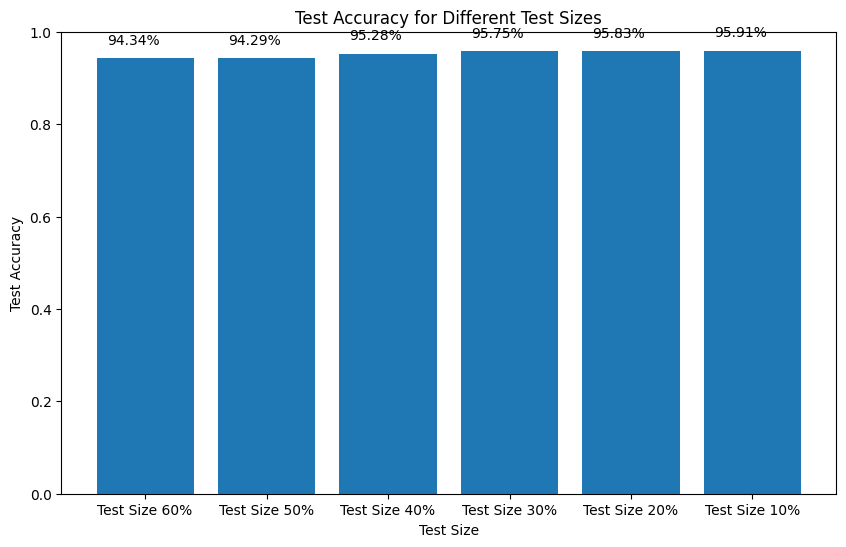

In [16]:
plt.figure(figsize=(10, 6))
bars = plt.bar([f"Test Size {int(100 * test_size)}%" for test_size in test_sizes], final_accuracy)
plt.xlabel('Test Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Test Sizes')
plt.ylim(0, 1.0)  # Set the y-axis limits to 0 and 1 for accuracy values

# Add percentage values above the bars
for bar, acc in zip(bars, final_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, acc + 0.03, f'{acc*100:.2f}%', ha='center', color='black', fontsize=10)

plt.show()


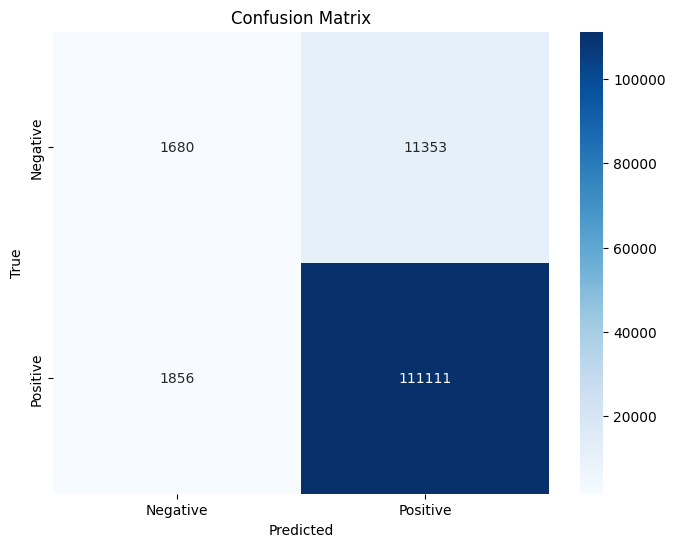

In [17]:
class_names = ['Negative', 'Positive']
import seaborn as sns


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

                                                                        BILSTM(USING ALONE)

In [18]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

final_accuracy = []
confusion_matrices = []  # Store confusion matrices for each test size

test_sizes = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

for test_size in test_sizes:
    xtr, xte, ytr, yte = train_test_split(x, y, test_size=test_size, random_state=42)

    # Define your model with a Bidirectional LSTM followed by a Simple RNN
    inputs = tf.keras.Input(shape=(max(l),))
    embedding = tf.keras.layers.Embedding(input_dim=30000, output_dim=64)(inputs)
    bi_lstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding)
    layer1 = tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.02))(bi_lstm)
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(layer1)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(xtr, ytr, validation_split=0.2, batch_size=32, epochs=20, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Generate predictions on the test set
    y_pred = model.predict(xte)

    # Convert probabilities to binary labels
    y_pred_binary = (y_pred > 0.5).astype(int)

    y_pred_classes_1d = y_pred_binary[:, 0]


    # Calculate confusion matrix
    confusion = confusion_matrix(yte, y_pred_classes_1d)
    confusion_matrices.append(confusion)

    # Evaluate the model on the test set
    loss, bilstm_accuracy = model.evaluate(xte, yte, verbose=0)
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {bilstm_accuracy * 100:.2f}%')
    final_accuracy.append(bilstm_accuracy)
    print(final_accuracy)

# Calculate and print the mean accuracy
bilstm_mean_accuracy = np.mean(final_accuracy)
print(f'Mean Accuracy: {bilstm_mean_accuracy * 100:.2f}%')

# Calculate the final confusion matrix using all test data
final_confusion_matrix = np.sum(confusion_matrices, axis=0)
print("Final Confusion Matrix:")
print(final_confusion_matrix)

# Calculate the number of positive and negative predictions
final_positive_predictions = np.sum(final_confusion_matrix[1, :])
final_negative_predictions = np.sum(final_confusion_matrix[0, :])

if final_positive_predictions > final_negative_predictions:
    overall_sentiment = 'Positive'
elif final_negative_predictions > final_positive_predictions:
    overall_sentiment = 'Negative'
else:
    overall_sentiment = 'Neutral'

# Print the overall sentiment
print(f'Overall Sentiment: {overall_sentiment}')


Epoch 1/20
600/600 [==============================] - 35s 53ms/step - loss: 0.6159 - accuracy: 0.8761 - val_loss: 0.5250 - val_accuracy: 0.8957
Epoch 2/20
600/600 [==============================] - 29s 49ms/step - loss: 0.4671 - accuracy: 0.9017 - val_loss: 0.4215 - val_accuracy: 0.9042
Epoch 3/20
600/600 [==============================] - 29s 49ms/step - loss: 0.3859 - accuracy: 0.9105 - val_loss: 0.3675 - val_accuracy: 0.9049
Epoch 4/20
600/600 [==============================] - 29s 49ms/step - loss: 0.3256 - accuracy: 0.9242 - val_loss: 0.2853 - val_accuracy: 0.9406
Epoch 5/20
600/600 [==============================] - 35s 58ms/step - loss: 0.2575 - accuracy: 0.9508 - val_loss: 0.2456 - val_accuracy: 0.9468
Epoch 6/20
600/600 [==============================] - 35s 58ms/step - loss: 0.2141 - accuracy: 0.9613 - val_loss: 0.2179 - val_accuracy: 0.9516
Epoch 7/20
600/600 [==============================] - 34s 58ms/step - loss: 0.1885 - accuracy: 0.9648 - val_loss: 0.2089 - val_accuracy:

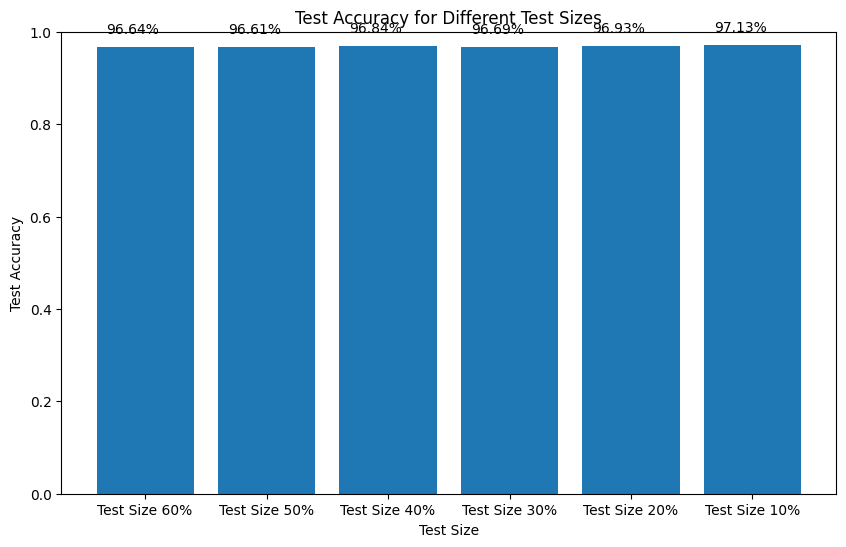

In [19]:
plt.figure(figsize=(10, 6))
bars = plt.bar([f"Test Size {int(100 * test_size)}%" for test_size in test_sizes], final_accuracy)
plt.xlabel('Test Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Test Sizes')
plt.ylim(0, 1.0)  # Set the y-axis limits to 0 and 1 for accuracy values

# Add percentage values above the bars
for bar, acc in zip(bars, final_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, acc + 0.03, f'{acc*100:.2f}%', ha='center', color='black', fontsize=10)

plt.show()


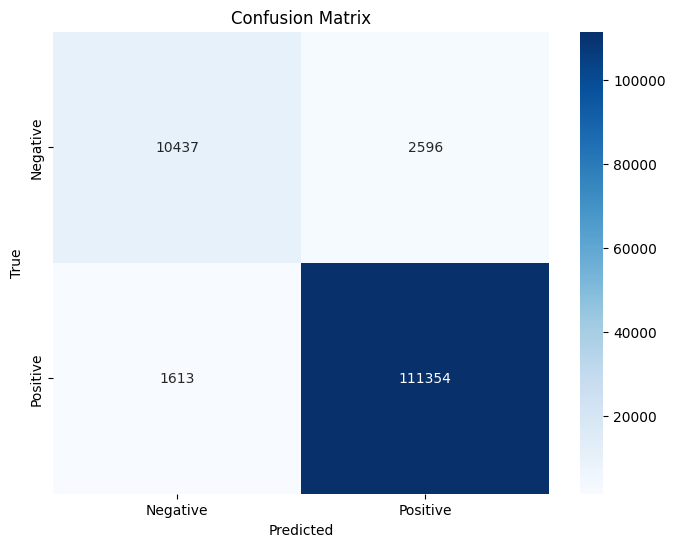

In [20]:
class_names = ['Negative', 'Positive']
import seaborn as sns


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

                                                                        GRU(using alone)

In [21]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

final_accuracy = []
confusion_matrices = []  # Store confusion matrices for each test size

test_sizes = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

for test_size in test_sizes:
    xtr, xte, ytr, yte = train_test_split(x, y, test_size=test_size, random_state=42)

    # Define your model with a Bidirectional LSTM followed by a Simple RNN
    inputs = tf.keras.Input(shape=(max(l),))
    embedding = tf.keras.layers.Embedding(input_dim=30000, output_dim=64)(inputs)
    gru = tf.keras.layers.GRU(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)(embedding)  # Change this line
    layer1 = tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.02))(gru)  # Change this line
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(layer1)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(xtr, ytr, validation_split=0.2, batch_size=32, epochs=20, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Generate predictions on the test set
    y_pred = model.predict(xte)

    # Convert probabilities to binary labels
    y_pred_binary = (y_pred > 0.5).astype(int)

    y_pred_classes_1d = y_pred_binary[:, 0]


    # Calculate confusion matrix
    confusion = confusion_matrix(yte, y_pred_classes_1d)
    confusion_matrices.append(confusion)

    # Evaluate the model on the test set
    loss, gru_accuracy = model.evaluate(xte, yte, verbose=0)
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {gru_accuracy * 100:.2f}%')
    final_accuracy.append(gru_accuracy)
    print(final_accuracy)

# Calculate and print the mean accuracy
gru_mean_accuracy = np.mean(final_accuracy)
print(f'Mean Accuracy: {gru_mean_accuracy * 100:.2f}%')

# Calculate the final confusion matrix using all test data
final_confusion_matrix = np.sum(confusion_matrices, axis=0)
print("Final Confusion Matrix:")
print(final_confusion_matrix)

# Calculate the number of positive and negative predictions
final_positive_predictions = np.sum(final_confusion_matrix[1, :])
final_negative_predictions = np.sum(final_confusion_matrix[0, :])

if final_positive_predictions > final_negative_predictions:
    overall_sentiment = 'Positive'
elif final_negative_predictions > final_positive_predictions:
    overall_sentiment = 'Negative'
else:
    overall_sentiment = 'Neutral'

# Print the overall sentiment
print(f'Overall Sentiment: {overall_sentiment}')


Epoch 1/20
600/600 [==============================] - 29s 43ms/step - loss: 0.4905 - accuracy: 0.8975 - val_loss: 0.3853 - val_accuracy: 0.8954
Epoch 2/20
600/600 [==============================] - 22s 36ms/step - loss: 0.3227 - accuracy: 0.8975 - val_loss: 0.2892 - val_accuracy: 0.8954
Epoch 3/20
600/600 [==============================] - 21s 35ms/step - loss: 0.2692 - accuracy: 0.8975 - val_loss: 0.2636 - val_accuracy: 0.8954
Epoch 4/20
600/600 [==============================] - 21s 35ms/step - loss: 0.2508 - accuracy: 0.8975 - val_loss: 0.2532 - val_accuracy: 0.8954
Epoch 5/20
600/600 [==============================] - 22s 36ms/step - loss: 0.2380 - accuracy: 0.8975 - val_loss: 0.2441 - val_accuracy: 0.8954
Epoch 6/20
600/600 [==============================] - 22s 37ms/step - loss: 0.2279 - accuracy: 0.8975 - val_loss: 0.2380 - val_accuracy: 0.8954
Epoch 7/20
600/600 [==============================] - 20s 34ms/step - loss: 0.2164 - accuracy: 0.8975 - val_loss: 0.2303 - val_accuracy:

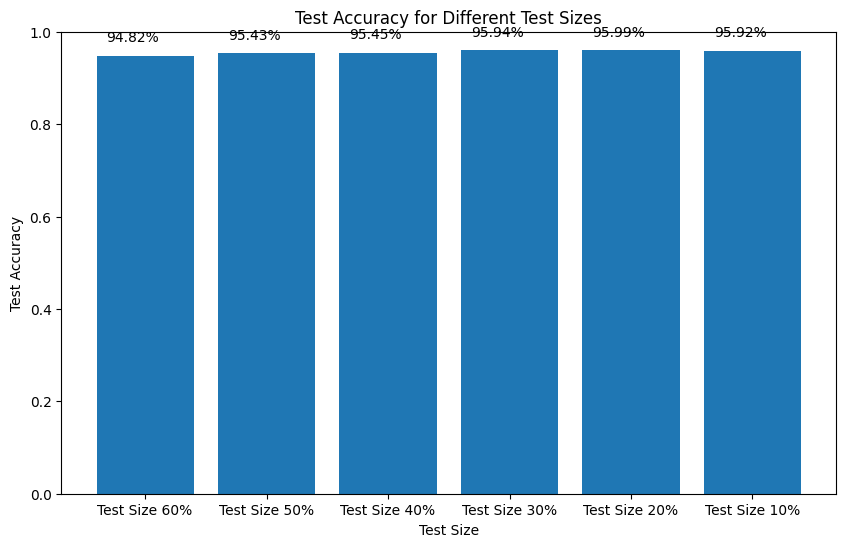

In [22]:
plt.figure(figsize=(10, 6))
bars = plt.bar([f"Test Size {int(100 * test_size)}%" for test_size in test_sizes], final_accuracy)
plt.xlabel('Test Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Test Sizes')
plt.ylim(0, 1.0)  # Set the y-axis limits to 0 and 1 for accuracy values

# Add percentage values above the bars
for bar, acc in zip(bars, final_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, acc + 0.03, f'{acc*100:.2f}%', ha='center', color='black', fontsize=10)

plt.show()


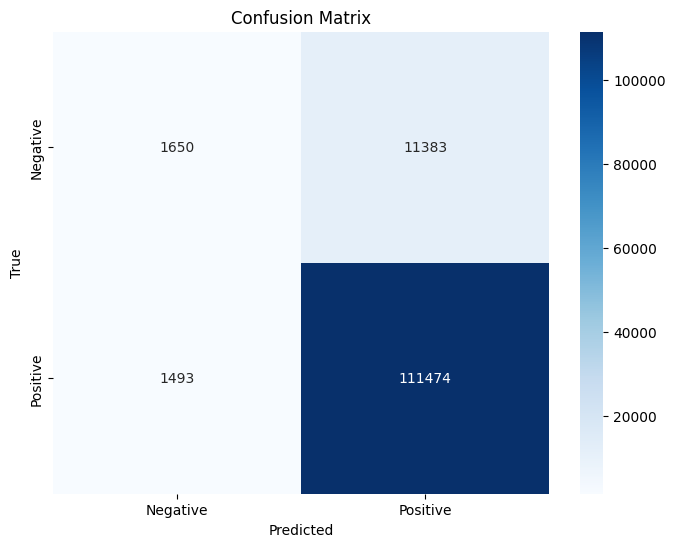

In [23]:
class_names = ['Negative', 'Positive']
import seaborn as sns


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

                                                                         BIDIRECTIONAL GRU

In [24]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

final_accuracy = []
confusion_matrices = []  # Store confusion matrices for each test size

test_sizes = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

for test_size in test_sizes:
    xtr, xte, ytr, yte = train_test_split(x, y, test_size=test_size, random_state=42)

    # Define your model with a Bidirectional GRU
    inputs = tf.keras.Input(shape=(max(l),))
    embedding = tf.keras.layers.Embedding(input_dim=30000, output_dim=64)(inputs)
    bigru = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding)  # Change this line
    layer1 = tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.02))(bigru)  # Change this line
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(layer1)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(xtr, ytr, validation_split=0.2, batch_size=32, epochs=20, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Generate predictions on the test set
    y_pred = model.predict(xte)

    # Convert probabilities to binary labels
    y_pred_binary = (y_pred > 0.5).astype(int)

    y_pred_classes_1d = y_pred_binary[:, 0]

    # Calculate confusion matrix
    confusion = confusion_matrix(yte, y_pred_classes_1d)
    confusion_matrices.append(confusion)

    # Evaluate the model on the test set
    loss, bigru_accuracy = model.evaluate(xte, yte, verbose=0)
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {bigru_accuracy * 100:.2f}%')
    final_accuracy.append(bigru_accuracy)
    print(final_accuracy)

# Calculate and print the mean accuracy
bigru_mean_accuracy = np.mean(final_accuracy)
print(f'Mean Accuracy: {bigru_mean_accuracy * 100:.2f}%')

# Calculate the final confusion matrix using all test data
final_confusion_matrix = np.sum(confusion_matrices, axis=0)
print("Final Confusion Matrix:")
print(final_confusion_matrix)

# Calculate the number of positive and negative predictions
final_positive_predictions = np.sum(final_confusion_matrix[1, :])
final_negative_predictions = np.sum(final_confusion_matrix[0, :])

if final_positive_predictions > final_negative_predictions:
    overall_sentiment = 'Positive'
elif final_negative_predictions > final_positive_predictions:
    overall_sentiment = 'Negative'
else:
    overall_sentiment = 'Neutral'

# Print the overall sentiment
print(f'Overall Sentiment: {overall_sentiment}')


Epoch 1/20
600/600 [==============================] - 46s 69ms/step - loss: 0.3350 - accuracy: 0.8975 - val_loss: 0.2640 - val_accuracy: 0.8954
Epoch 2/20
600/600 [==============================] - 38s 63ms/step - loss: 0.2387 - accuracy: 0.8975 - val_loss: 0.2307 - val_accuracy: 0.8954
Epoch 3/20
600/600 [==============================] - 37s 62ms/step - loss: 0.2175 - accuracy: 0.8975 - val_loss: 0.2158 - val_accuracy: 0.8954
Epoch 4/20
600/600 [==============================] - 36s 60ms/step - loss: 0.1886 - accuracy: 0.8975 - val_loss: 0.1922 - val_accuracy: 0.8954
Epoch 5/20
600/600 [==============================] - 37s 61ms/step - loss: 0.1730 - accuracy: 0.8979 - val_loss: 0.1785 - val_accuracy: 0.9012
Epoch 6/20
600/600 [==============================] - 39s 65ms/step - loss: 0.1586 - accuracy: 0.9605 - val_loss: 0.1687 - val_accuracy: 0.9616
Epoch 7/20
600/600 [==============================] - 41s 68ms/step - loss: 0.1466 - accuracy: 0.9742 - val_loss: 0.1616 - val_accuracy:

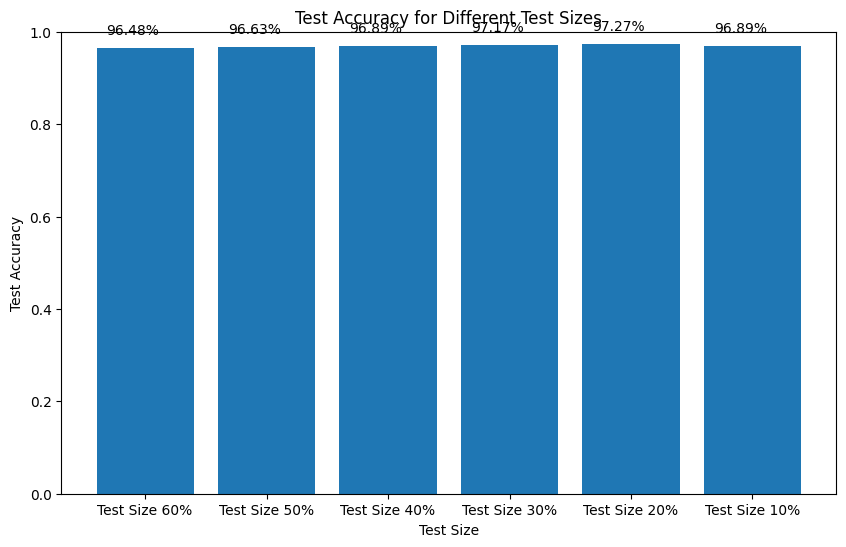

In [25]:
plt.figure(figsize=(10, 6))
bars = plt.bar([f"Test Size {int(100 * test_size)}%" for test_size in test_sizes], final_accuracy)
plt.xlabel('Test Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Test Sizes')
plt.ylim(0, 1.0)  # Set the y-axis limits to 0 and 1 for accuracy values

# Add percentage values above the bars
for bar, acc in zip(bars, final_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, acc + 0.03, f'{acc*100:.2f}%', ha='center', color='black', fontsize=10)

plt.show()


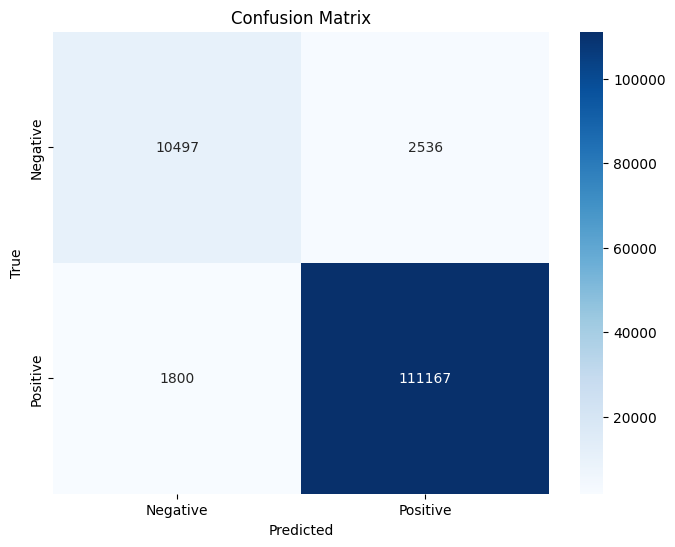

In [26]:
class_names = ['Negative', 'Positive']
import seaborn as sns


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

                                                                        BILSTM WITH RNN

In [27]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

final_accuracy = []
confusion_matrices = []  # Store confusion matrices for each test size

test_sizes = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

for test_size in test_sizes:
    xtr, xte, ytr, yte = train_test_split(x, y, test_size=test_size, random_state=42)

    # Define your model with a Bidirectional LSTM followed by a Simple RNN
    inputs = tf.keras.Input(shape=(max(l),))
    embedding = tf.keras.layers.Embedding(input_dim=30000, output_dim=64)(inputs)
    bilstm = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding)
    rnn = tf.keras.layers.SimpleRNN(64)(bilstm)  # Add a Simple RNN layer after the BiLSTM
    layer1 = tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.02))(rnn)  # Change this line
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(layer1)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(xtr, ytr, validation_split=0.2, batch_size=32, epochs=20, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Generate predictions on the test set
    y_pred = model.predict(xte)

    # Convert probabilities to binary labels
    y_pred_binary = (y_pred > 0.5).astype(int)

    y_pred_classes_1d = y_pred_binary[:, 0]

    # Calculate confusion matrix
    confusion = confusion_matrix(yte, y_pred_classes_1d)
    confusion_matrices.append(confusion)

    # Evaluate the model on the test set
    loss, bilstmrnn_accuracy = model.evaluate(xte, yte, verbose=0)
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {bilstmrnn_accuracy * 100:.2f}%')
    final_accuracy.append(bilstmrnn_accuracy)
    print(final_accuracy)

# Calculate and print the mean accuracy
mean_accuracy = np.mean(final_accuracy)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Calculate the final confusion matrix using all test data
final_confusion_matrix = np.sum(confusion_matrices, axis=0)
print("Final Confusion Matrix:")
print(final_confusion_matrix)

# Calculate the number of positive and negative predictions
final_positive_predictions = np.sum(final_confusion_matrix[1, :])
final_negative_predictions = np.sum(final_confusion_matrix[0, :])

# Determine the overall sentiment based on the majority class
if final_positive_predictions > final_negative_predictions:
    print('Overall Sentiment: Positive')
elif final_negative_predictions > final_positive_predictions:
    print('Overall Sentiment: Negative')
else:
    print('Overall Sentiment: Neutral')


Epoch 1/20
600/600 [==============================] - 46s 71ms/step - loss: 0.6147 - accuracy: 0.8766 - val_loss: 0.5255 - val_accuracy: 0.8954
Epoch 2/20
600/600 [==============================] - 275s 460ms/step - loss: 0.4706 - accuracy: 0.8975 - val_loss: 0.4289 - val_accuracy: 0.8954
Epoch 3/20
600/600 [==============================] - 1215s 2s/step - loss: 0.3987 - accuracy: 0.8975 - val_loss: 0.3789 - val_accuracy: 0.8954
Epoch 4/20
600/600 [==============================] - 560s 935ms/step - loss: 0.3618 - accuracy: 0.8975 - val_loss: 0.3539 - val_accuracy: 0.8954
Epoch 5/20
600/600 [==============================] - 56s 93ms/step - loss: 0.3434 - accuracy: 0.8975 - val_loss: 0.3415 - val_accuracy: 0.8954
Epoch 6/20
600/600 [==============================] - 55s 91ms/step - loss: 0.3336 - accuracy: 0.8975 - val_loss: 0.3356 - val_accuracy: 0.8954
Epoch 7/20
600/600 [==============================] - 55s 91ms/step - loss: 0.3310 - accuracy: 0.8975 - val_loss: 0.3354 - val_accur

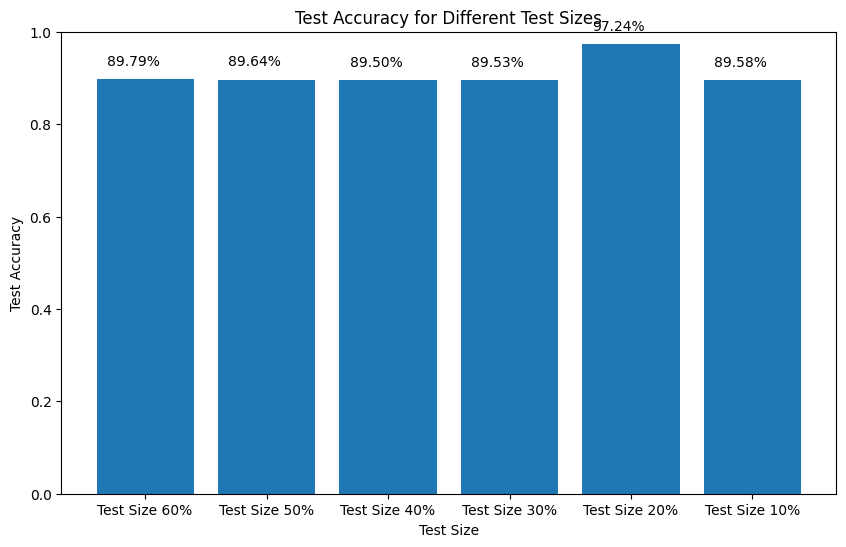

In [28]:
plt.figure(figsize=(10, 6))
bars = plt.bar([f"Test Size {int(100 * test_size)}%" for test_size in test_sizes], final_accuracy)
plt.xlabel('Test Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Test Sizes')
plt.ylim(0, 1.0)  # Set the y-axis limits to 0 and 1 for accuracy values

# Add percentage values above the bars
for bar, acc in zip(bars, final_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, acc + 0.03, f'{acc*100:.2f}%', ha='center', color='black', fontsize=10)

plt.show()


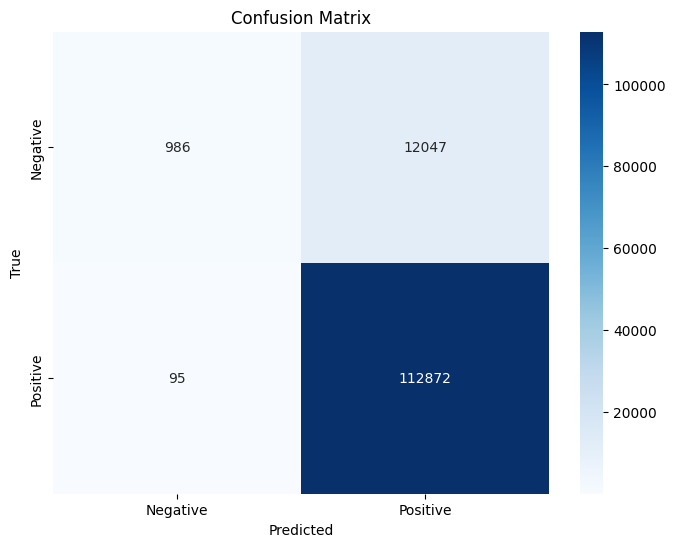

In [29]:
class_names = ['Negative', 'Positive']
import seaborn as sns


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

                                                                        BI-GRU WITH RNN

In [30]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

final_accuracy = []
confusion_matrices = []  # Store confusion matrices for each test size

test_sizes = [0.6, 0.5, 0.4, 0.3, 0.2, 0.1]

for test_size in test_sizes:
    xtr, xte, ytr, yte = train_test_split(x, y, test_size=test_size, random_state=42)

    # Define your model with a Bidirectional GRU followed by a Simple RNN
    inputs = tf.keras.Input(shape=(max(l),))
    embedding = tf.keras.layers.Embedding(input_dim=30000, output_dim=64)(inputs)
    bigru = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(100, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))(embedding)
    rnn = tf.keras.layers.SimpleRNN(64)(bigru)  # Add a Simple RNN layer after the Bidirectional GRU
    layer1 = tf.keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=tf.keras.regularizers.l2(0.02))(rnn)  # Change this line
    outputs = tf.keras.layers.Dense(1, activation='sigmoid')(layer1)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    model.fit(xtr, ytr, validation_split=0.2, batch_size=32, epochs=20, callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)])

    # Generate predictions on the test set
    y_pred = model.predict(xte)

    # Convert probabilities to binary labels
    y_pred_binary = (y_pred > 0.5).astype(int)

    y_pred_classes_1d = y_pred_binary[:, 0]

    # Calculate confusion matrix
    confusion = confusion_matrix(yte, y_pred_classes_1d)
    confusion_matrices.append(confusion)

    # Evaluate the model on the test set
    loss, bigrurnn_accuracy = model.evaluate(xte, yte, verbose=0)
    print(f'Test Loss: {loss:.4f}')
    print(f'Test Accuracy: {bigrurnn_accuracy * 100:.2f}%')
    final_accuracy.append(bigrurnn_accuracy)
    print(final_accuracy)

# Calculate and print the mean accuracy
mean_accuracy = np.mean(final_accuracy)
print(f'Mean Accuracy: {mean_accuracy * 100:.2f}%')

# Calculate the final confusion matrix using all test data
final_confusion_matrix = np.sum(confusion_matrices, axis=0)
print("Final Confusion Matrix:")
print(final_confusion_matrix)

# Calculate the number of positive and negative predictions
final_positive_predictions = np.sum(final_confusion_matrix[1, :])
final_negative_predictions = np.sum(final_confusion_matrix[0, :])

# Determine the overall sentiment based on the majority class
if final_positive_predictions > final_negative_predictions:
    print('Overall Sentiment: Positive')
elif final_negative_predictions > final_positive_predictions:
    print('Overall Sentiment: Negative')
else:
    print('Overall Sentiment: Neutral')


Epoch 1/20
600/600 [==============================] - 61s 93ms/step - loss: 0.6098 - accuracy: 0.8799 - val_loss: 0.5242 - val_accuracy: 0.8954
Epoch 2/20
600/600 [==============================] - 61s 101ms/step - loss: 0.4686 - accuracy: 0.8975 - val_loss: 0.4261 - val_accuracy: 0.8954
Epoch 3/20
600/600 [==============================] - 55s 91ms/step - loss: 0.3793 - accuracy: 0.8975 - val_loss: 0.3428 - val_accuracy: 0.8954
Epoch 4/20
600/600 [==============================] - 57s 95ms/step - loss: 0.3344 - accuracy: 0.8975 - val_loss: 0.3365 - val_accuracy: 0.8954
Epoch 5/20
600/600 [==============================] - 52s 87ms/step - loss: 0.3318 - accuracy: 0.8975 - val_loss: 0.3357 - val_accuracy: 0.8954
Epoch 6/20
600/600 [==============================] - 50s 83ms/step - loss: 0.3313 - accuracy: 0.8975 - val_loss: 0.3356 - val_accuracy: 0.8954
Epoch 7/20
600/600 [==============================] - 50s 83ms/step - loss: 0.3312 - accuracy: 0.8975 - val_loss: 0.3353 - val_accuracy

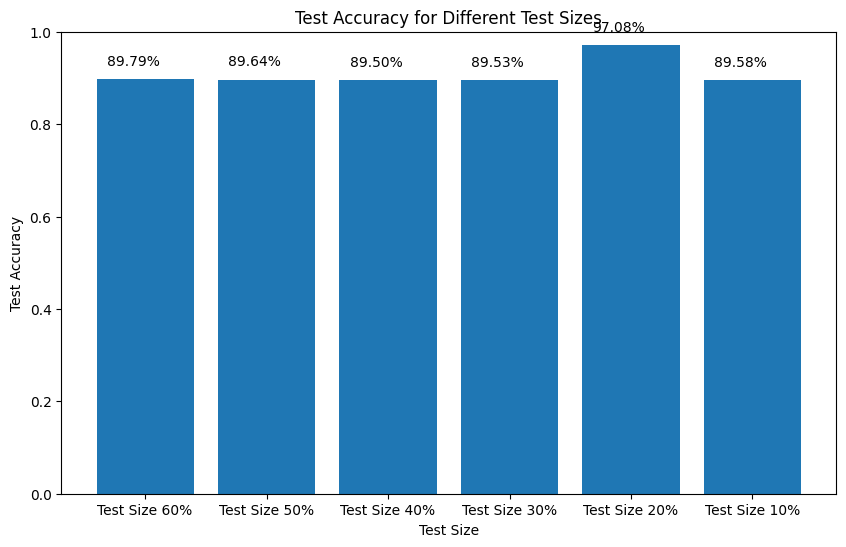

In [31]:
plt.figure(figsize=(10, 6))
bars = plt.bar([f"Test Size {int(100 * test_size)}%" for test_size in test_sizes], final_accuracy)
plt.xlabel('Test Size')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy for Different Test Sizes')
plt.ylim(0, 1.0)  # Set the y-axis limits to 0 and 1 for accuracy values

# Add percentage values above the bars
for bar, acc in zip(bars, final_accuracy):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, acc + 0.03, f'{acc*100:.2f}%', ha='center', color='black', fontsize=10)

plt.show()


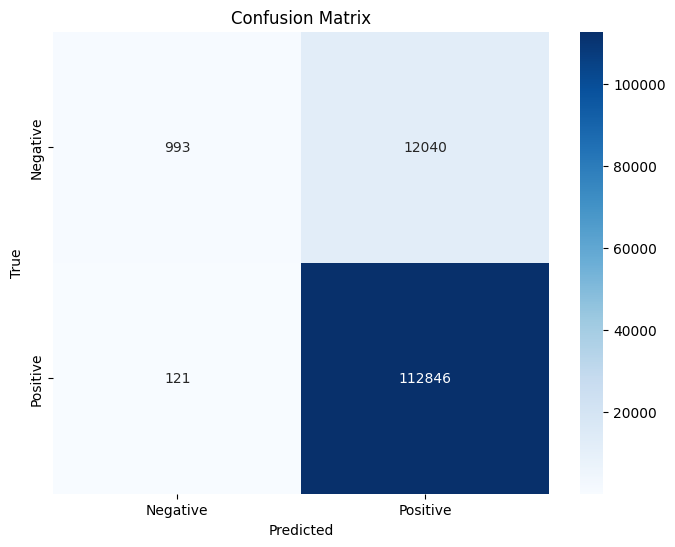

In [32]:
class_names = ['Negative', 'Positive']
import seaborn as sns


# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(final_confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

                                                                  FINAL ACCURACY FOR ALL MODEL

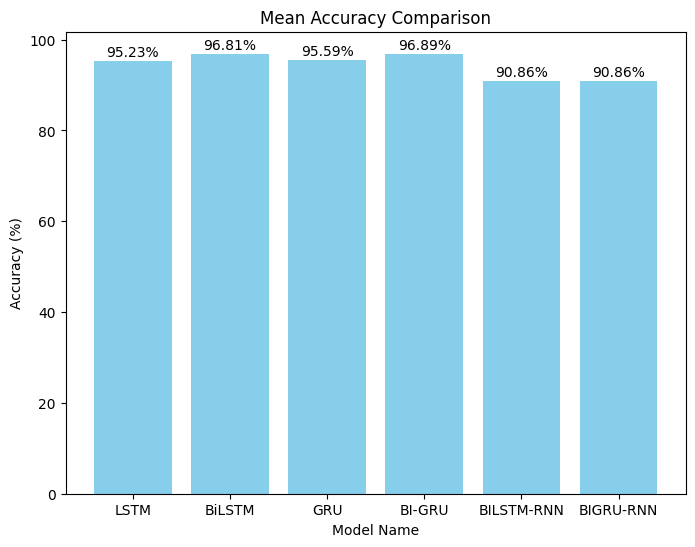

In [33]:
import matplotlib.pyplot as plt

model_names = ["LSTM", "BiLSTM", "GRU","BI-GRU","BILSTM-RNN","BIGRU-RNN"]
mean_lstm_percentage = lstm_mean_accuracy * 100  
mean_bilstm_percentage = bilstm_mean_accuracy * 100
mean_gru_percentage = gru_mean_accuracy * 100
mean_bigru_percentage = bigru_mean_accuracy * 100
mean_bilstmrnn_percentage = mean_accuracy * 100
mean_bigrumrnn_percentage = mean_accuracy * 100



plt.figure(figsize=(8, 6))  
bars = plt.bar(model_names, [mean_lstm_percentage, mean_bilstm_percentage,mean_gru_percentage,mean_bigru_percentage,mean_bilstmrnn_percentage,mean_bigrumrnn_percentage], color='skyblue')
plt.xlabel("Model Name")
plt.ylabel("Accuracy (%)")


for bar, label in zip(bars, [f'{mean_lstm_percentage:.2f}%', f'{mean_bilstm_percentage:.2f}%',f'{mean_gru_percentage:.2f}%',f'{mean_bigru_percentage:.2f}%',f'{mean_bilstmrnn_percentage:.2f}%',f'{mean_bigrumrnn_percentage:.2f}%']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, label, ha='center')

plt.title("Mean Accuracy Comparison")
plt.show()
